# Task 04

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import csv file

tdata=pd.read_csv("twitter_training.csv")

In [4]:
tdata

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
tdata.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
#reading dataset , giving columns different name manually

cols=['ID', 'Topic', 'Sentiment', 'Text']
ndata = pd.read_csv(r"C:\Users\91981\Downloads\twitter_training.csv",names=cols)

In [7]:


ndata.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
# information about dataset

ndata.shape

(74682, 4)

In [9]:
ndata.columns

Index(['ID', 'Topic', 'Sentiment', 'Text'], dtype='object')

In [10]:

ndata.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [11]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
#look for all different sentiments shown by public

ndata['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [13]:
#Look for missing values

ndata.isna().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [14]:
#drop text column as it contains 686

ndata.dropna(inplace=True)

In [15]:
ndata.isna().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [16]:
#check for duplicate values

ndata.duplicated().sum()

2340

In [17]:
ndata.drop_duplicates(inplace=True)


ndata.duplicated().sum()

0

# visualization

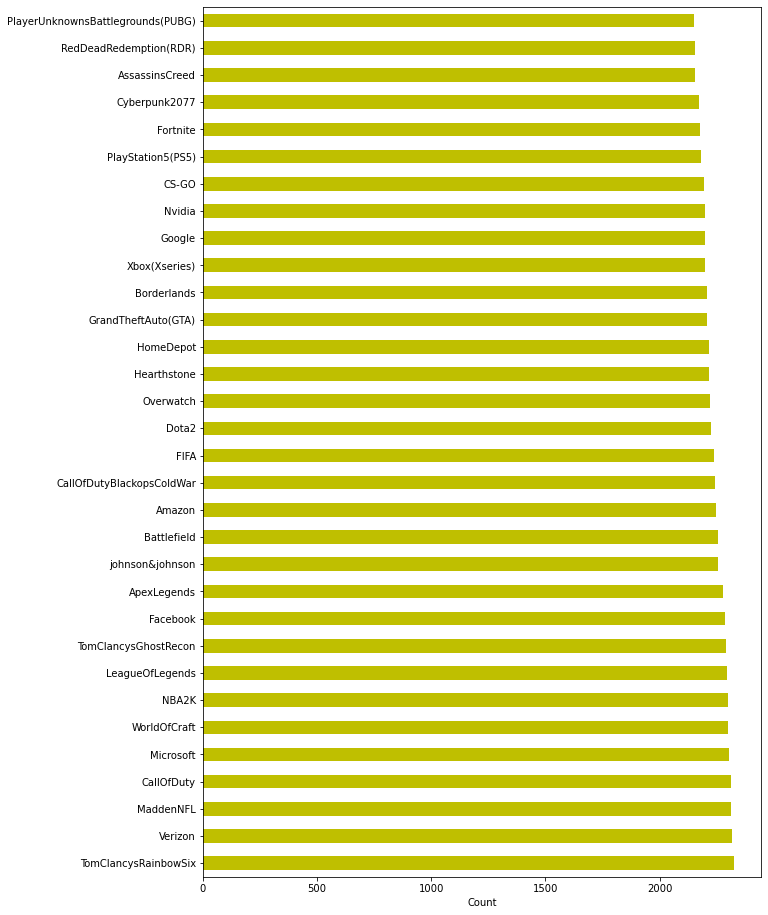

In [18]:
#visualization for different topics

plt.figure(figsize=(10,16))
ndata['Topic'].value_counts().plot(kind='barh',color='y')
plt.xlabel("Count")
plt.show()

- It is observed that TomClancysRainbowSix has the highest number of view count.
- It is observed that PUBG has the least number of view count .

In [19]:
# visualization of sentiments
scount=ndata['Sentiment'].value_counts()

scount

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64

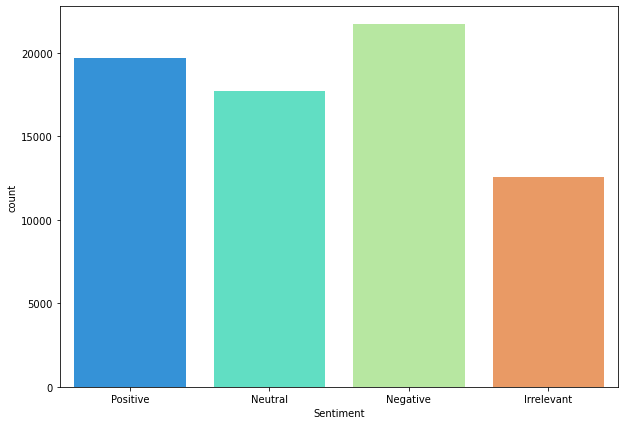

In [20]:
# create countplot for sentiment

plt.figure(figsize=(10,7))
sns.countplot(x='Sentiment' ,data= ndata ,palette='rainbow')

plt.show()

- The majority of sentiments are negative.
- The minority of sentiments are irrelevant.

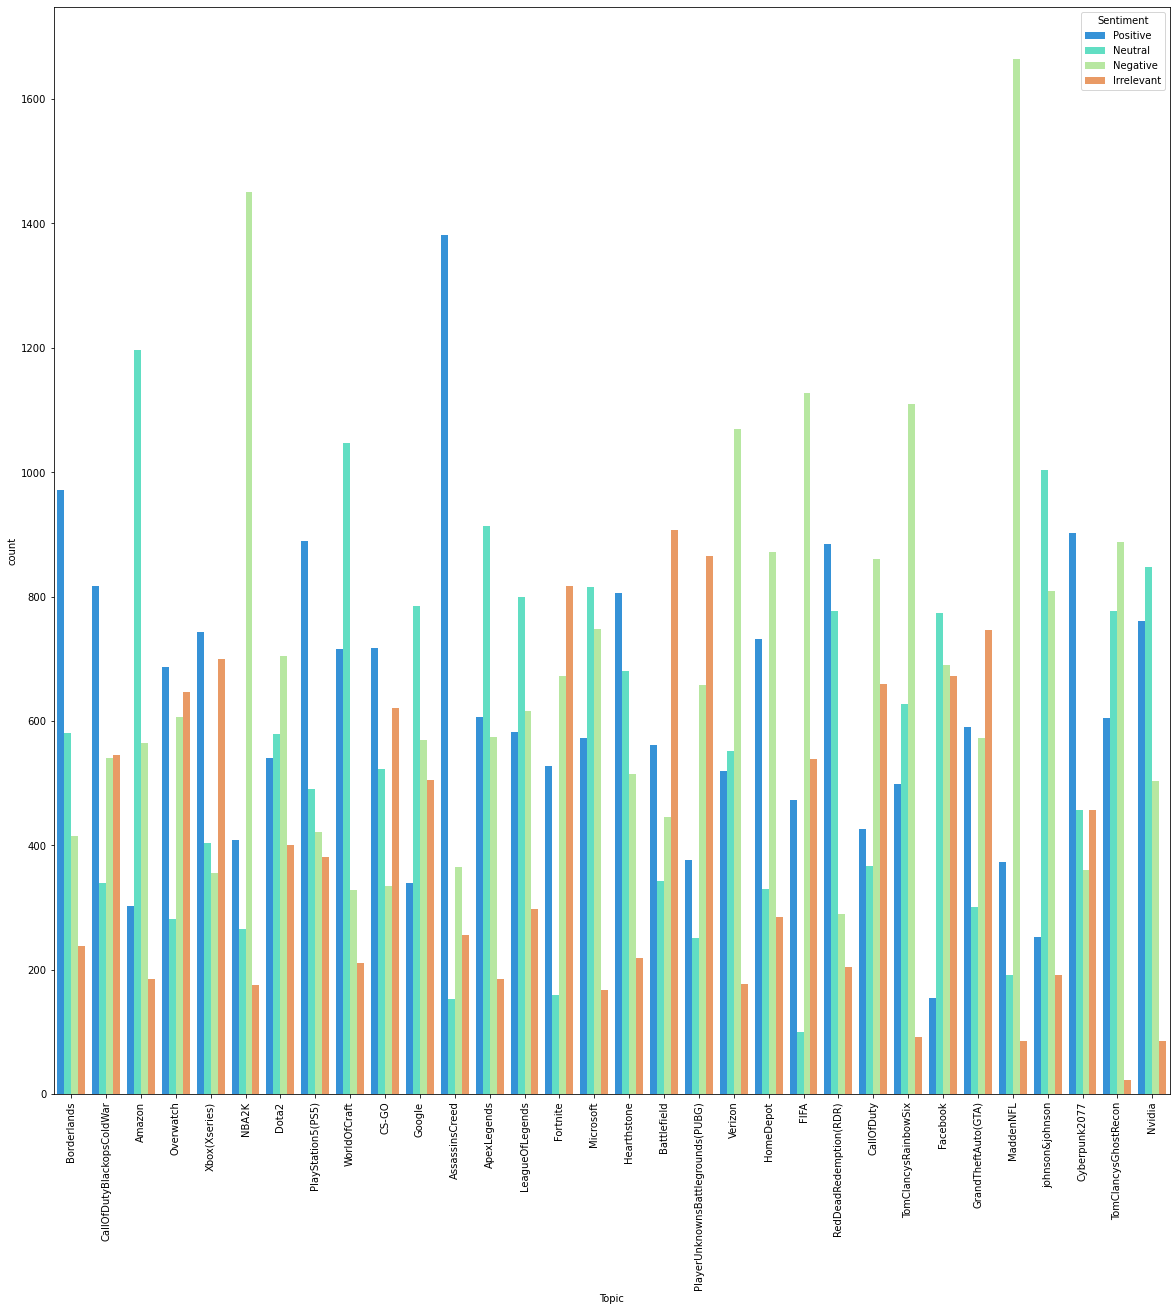

In [21]:
#Sentiment Distribution Topic-wise

plt.figure(figsize=(20,20))
sns.countplot(x='Topic',data=ndata,hue='Sentiment',palette='rainbow')
plt.xticks(rotation=90)
plt.show()


Observation :

- Out of all Assassins Creed has the highest number of positive review and facebook have least number of positive review.
- Out of all MaddenNFL has the highest number of negative review and RDR has the least number of negative reviw.
- Out of all Amazon has highest number of neutral review and Fifa has the least number of neutral review.
- Out of all Battlefeild has the highest number of irrelevent review and TomclancysGhostRecon has the least number of irrelevant review.
- TomCalncyRainbowSix which has the highest review count has more negative review in comparison to its positive review.

In [58]:


## Group by Topic and Sentiment
topic_wise_sentiment = ndata.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

topic_counts = ndata['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

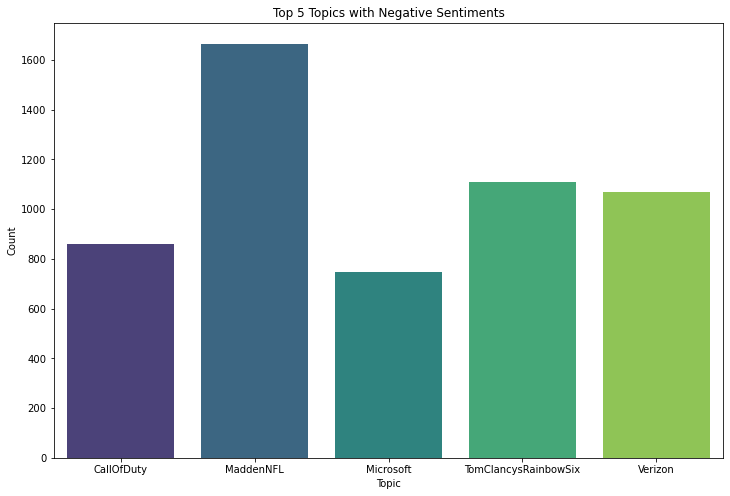

In [59]:
# Top 5 topics with negative semtiments

plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')

plt.show()

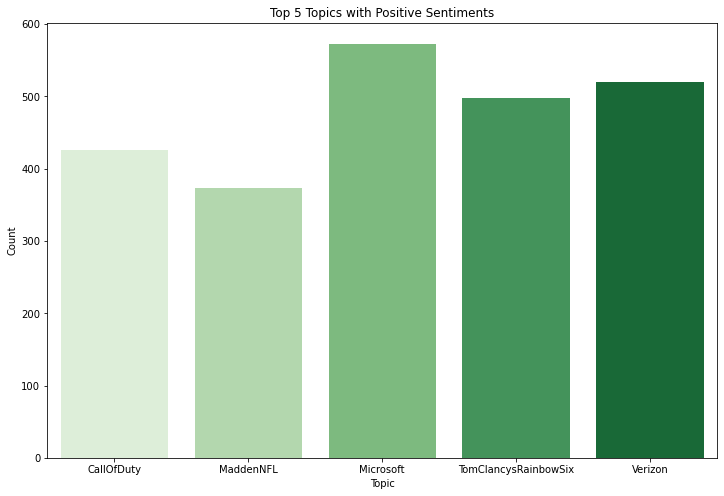

In [61]:
#Top 5 Topics with Positive Sentiments


plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')

plt.show()

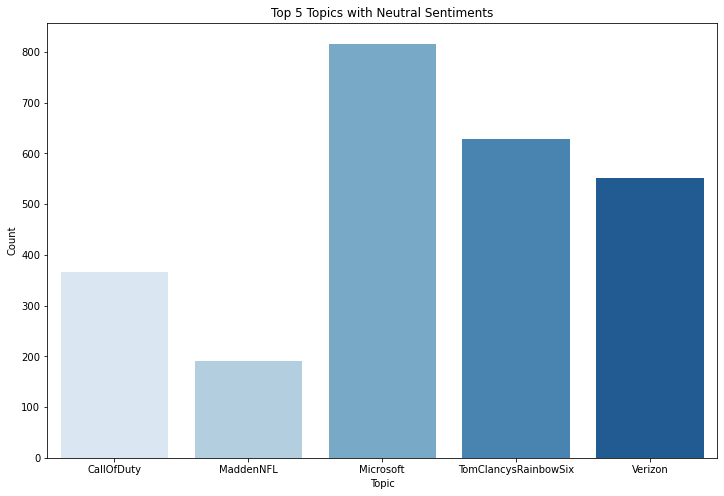

In [62]:
#Top 5 Topics with Neutral Sentiments

plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')


plt.show()

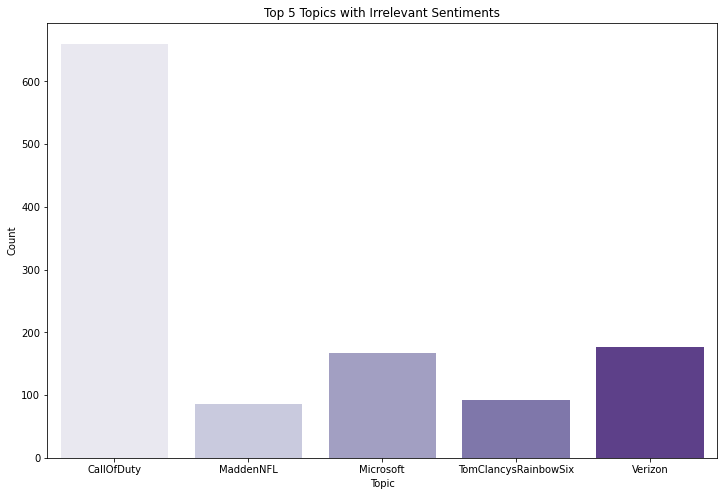

In [64]:
#Top 5 Topics with Irrelevant Sentiments


plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')

plt.show()

Observation from All top 5 sentiments : 
- MaddenNFL has the highest negative review while Microsoft has the lowest negative review. 
- Microsoft has the highest positive review while MaddenNFL has the lowest positive review. 
- Microsoft has the highest neutral review while MaddenNFL has the lowest neutral review. 
- Call of duty has the higest irrelevant review while MaddenNFL has the lowest irrelevant review.

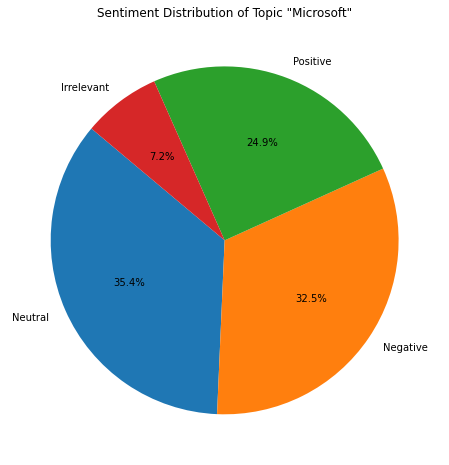

In [65]:
#Sentiment Distribution in Microsoft

# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = ndata[ndata['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

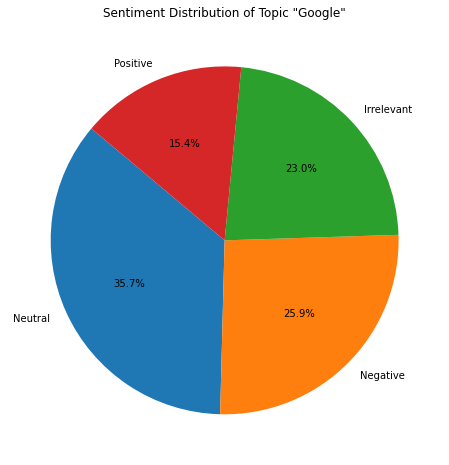

In [66]:
#Sentiment Distribution in Google
# Filter the dataset to include only entries related to the topic 'Google'
google_data = ndata[ndata['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

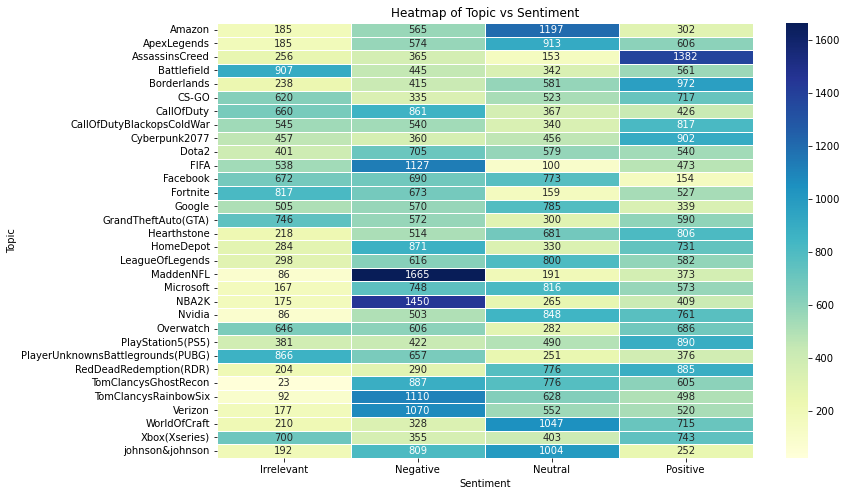

In [70]:
# Create the crosstab
crosstab = pd.crosstab(index=ndata['Topic'], columns=ndata['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()


- MaddenNFL abd NBA2K has highest negative review indicating strong dissatisfaction.
- Battlefield and PUBG has highest irrelevant review .
- AssasinCreed and Borderlands has the highest positive review showing public favourable opinion.
- Amazon and world of craft shoes the highest neutral review showing public mixed opinions.


# Sentiment Analysis :


1) Most Frequent Topic:
The topic TomClancyRainbowSix was the most discussed among all the topics in the dataset. This means it appeared more frequently than any other topic, showing that it gained a lot of attention from Twitter users. This could be due to recent game updates, events, or controversies that sparked conversations. Its high presence in the dataset highlights how certain gaming topics can become viral and trend widely within online communities.
The high count of negative review in comparison with the less amount of positive review shows peoples dissatisfication.   

2) Sentiment Distribution:
When analyzing the overall sentiment of tweets, it was found that the majority had a negative tone, making up 30.3% of the total data. This suggests that users often express dissatisfaction or criticism on Twitter, especially regarding certain topics.
Positive tweets followed closely at 27.5%, showing that many users also share appreciation, praise, or excitement.
Neutral sentiment accounted for 24.7%, indicating that a large portion of the tweets were either informational or did not clearly express a strong opinion—such as news, announcements, or general observations.
Lastly, irrelevant tweets made up 17.5%, representing content that did not contribute meaningful sentiment (e.g., spam, off-topic content, or vague mentions).

3) Sentiment of Specific Topics:
Certain topics had a more distinct sentiment trend. For instance, "Google" and "Microsoft" mostly received neutral sentiment, suggesting that tweets about these companies were more factual, balanced, or news-driven rather than emotional or opinion-heavy. This makes sense since discussions about tech companies often revolve around product launches, features, updates, or company-related news, which don’t necessarily invoke strong feelings.
On the other hand, game-related topics like "Assassin’s Creed", "Call of Duty", and "Cyberpunk2077" had more polarized sentiment, with many users expressing either strong positive support or criticism depending on their experience.